In [1]:
import env
import pandas as pd
import pydataset as data
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = sns.load_dataset('iris')
type(df_iris)

#### Print the first three rows.

In [ ]:
df_iris.head(3)

#### Print the number of rows and columns (shape)

In [ ]:
df_iris.shape

#### Print the column names

In [ ]:
df_iris.columns

#### Print the data type of each column

In [ ]:
df_iris.dtypes

#### Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

### 5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

In [ ]:
type(df_excel)

#### Assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

#### Print the number of rows of your original dataframe

In [ ]:
len(df_excel)

#### Print the first 5 column names

In [ ]:
df_excel.columns[:5]

#### Print the column names that have a data type of object

In [ ]:
df_excel.dtypes

In [ ]:
df_excel.select_dtypes(include='object').columns

#### Compute the range for each of the numeric variables.

In [ ]:
range = df_excel.select_dtypes(exclude='object').max() - df_excel.select_dtypes(exclude='object').min()

In [ ]:
range

### 6. Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

#### Print the first 3 rows

In [ ]:
df_google.head(3)

#### Print the number of rows and columns

In [ ]:
df_google.shape

#### Print the column names

In [ ]:
df_google.columns

#### Print the data type of each column

In [ ]:
df_google.dtypes

#### Print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

#### Print the unique values for each of your categorical variables

In [ ]:
df_google_objects = df_google.select_dtypes(include='object')
df_google_objects

In [ ]:
for col in df_google_objects.columns:
    if df_google_objects[col].dtypes == 'object':
        print(f'{col} has {df_google_objects[col].nunique()} unique values.')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

## Data Prep Exercises

### Using the Iris Data:

#### 1. Use the function defined in acquire.py to load the iris data.
#### 2. Drop the species_id and measurement_id columns.
#### 3. Rename the species_name column to just species.
#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe.
#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
___________________________________________________________________________________________________
- - - - - - - -

#### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
iris_df = acquire.get_iris_data()

In [ ]:
iris_df.info()

#### 2. Drop the species_id and measurement_id columns

In [ ]:

# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['species_id']
iris_df = iris_df.drop(columns=cols_to_drop)


In [ ]:
iris_df.shape

In [ ]:
iris_df.head()

#### 3. Rename the species_name column to just species.

In [ ]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)

In [ ]:
iris_df.head()

#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe.



In [ ]:
dummy_species = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=[True, True])

In [ ]:
dummy_species

In [ ]:
iris_df = pd.concat([iris_df, dummy_species], axis=1)

In [ ]:
iris_df.head()

#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    cols_to_drop = ['species_id']
    iris_df = df.drop(columns=cols_to_drop)
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_species = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=[True, True])
    iris_df = pd.concat([iris_df, dummy_species], axis=1)
    return iris_df

In [ ]:
prep_iris(iris_df)

### Using the Titanic dataset

#### 1. Use the function defined in acquire.py to load the Titanic data.

In [ ]:
titanic_df = acquire.get_titanic_data()

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.info()

#### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
titanic_df = titanic_df.drop_duplicates()
titanic_df = titanic_df.drop(columns=['age','deck', 'embarked'])

In [ ]:
titanic_df.info()

In [ ]:
titanic_df['embark_town'] = titanic_df['embark_town'].fillna(value='Southampton')

In [ ]:
titanic_df.info()

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(titanic_df[['sex','class','embark_town']],dummy_na=False, drop_first=[True,True,True])

In [ ]:
dummy_df

In [ ]:
titanic_df = pd.concat([titanic_df,dummy_df],axis=1)
titanic_df.head()

#### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    titanic_df = df.drop_duplicates()
    titanic_df = titanic_df.drop(columns=['age','deck', 'embarked'])
    titanic_df['embark_town'] = titanic_df['embark_town'].fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex','class','embark_town']],dummy_na=False, drop_first=[True,True])
    titanic_df = pd.concat([titanic_df,dummy_df],axis=1)
    return titanic_df

In [ ]:
titanic_df.head()

In [ ]:
prep_titanic(titanic_df).head()

### Using the Telco dataset

#### 1. Use the function defined in acquire.py to load the Telco data.

In [ ]:
telco_df = acquire.get_telco_data()

In [ ]:
telco_df.info()

#### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
telco_df.head()

In [ ]:
telco_df = telco_df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id'])

In [ ]:
telco_df.info()

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(telco_df[['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])

In [ ]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [ ]:
telco_df.head()

#### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
        telco_df = df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id'])
        dummy_df = pd.get_dummies(telco_df[['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])
        telco_df = pd.concat([telco_df, dummy_df], axis=1)
        return telco_df

In [ ]:
prep_telco(telco_df).head()

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [3]:
def prep_iris(df):
    cols_to_drop = ['species_id']
    iris_df = df.drop(columns=cols_to_drop)
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_species = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=[True, True])
    iris_df = pd.concat([iris_df, dummy_species], axis=1)
    return iris_df

In [4]:
iris_df = acquire.get_iris_data()

In [5]:
iris_df = prep_iris(iris_df)

In [6]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


In [10]:
dummy_iris = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True])

In [11]:
dummy_iris.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [12]:
iris_df = pd.concat([iris_df, dummy_iris], axis=1)

In [13]:
iris_df

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0,0,0


In [14]:
train, test = train_test_split(iris_df, test_size = .2, random_state=123)

In [16]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 130 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             120 non-null    object 
 1   sepal_length        120 non-null    float64
 2   sepal_width         120 non-null    float64
 3   petal_length        120 non-null    float64
 4   petal_width         120 non-null    float64
 5   versicolor          120 non-null    uint8  
 6   virginica           120 non-null    uint8  
 7   species_versicolor  120 non-null    uint8  
 8   species_virginica   120 non-null    uint8  
dtypes: float64(4), object(1), uint8(4)
memory usage: 6.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 72 to 4
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             30 non-null     object 
 1   sepal_length        30 non-null   

In [17]:
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [18]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (84, 9)
Validate: (36, 9)
Test: (30, 9)


### Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

* Document takeaways & any actions.

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 56 to 113
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   versicolor          84 non-null     uint8  
 6   virginica           84 non-null     uint8  
 7   species_versicolor  84 non-null     uint8  
 8   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(4)
memory usage: 4.3+ KB


In [23]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0,1,0
40,setosa,5.0,3.5,1.3,0.3,0,0,0,0
70,versicolor,5.9,3.2,4.8,1.8,1,0,1,0
23,setosa,5.1,3.3,1.7,0.5,0,0,0,0
139,virginica,6.9,3.1,5.4,2.1,0,1,0,1


In [25]:
print(train.describe())
print(validate.describe())
print(test.describe())

       sepal_length  sepal_width  petal_length  petal_width  versicolor  \
count     84.000000    84.000000     84.000000    84.000000   84.000000   
mean       5.841667     3.028571      3.804762     1.211905    0.369048   
std        0.813324     0.428101      1.718777     0.732450    0.485445   
min        4.500000     2.000000      1.000000     0.100000    0.000000   
25%        5.100000     2.800000      1.600000     0.375000    0.000000   
50%        5.800000     3.000000      4.350000     1.300000    0.000000   
75%        6.400000     3.300000      5.100000     1.800000    1.000000   
max        7.900000     4.000000      6.700000     2.500000    1.000000   

       virginica  species_versicolor  species_virginica  
count  84.000000           84.000000          84.000000  
mean    0.321429            0.369048           0.321429  
std     0.469830            0.485445           0.469830  
min     0.000000            0.000000           0.000000  
25%     0.000000            0.0000

In [27]:
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]

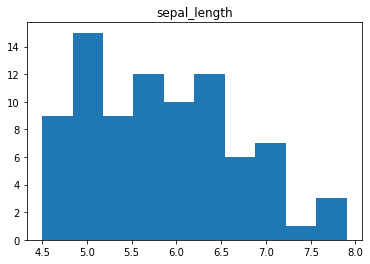

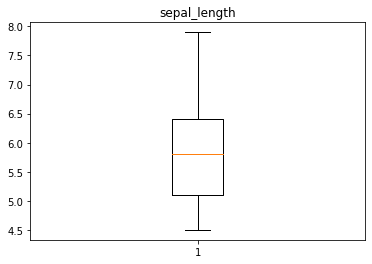

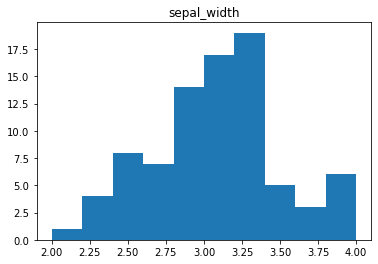

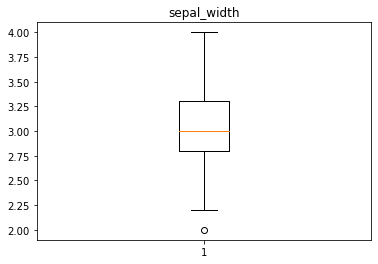

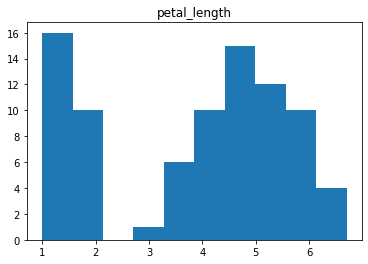

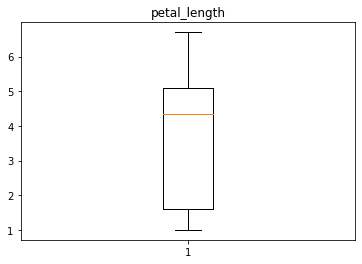

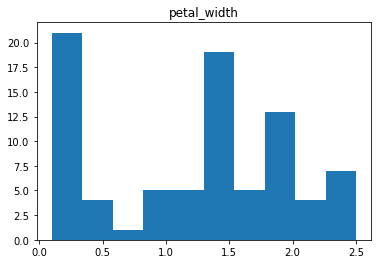

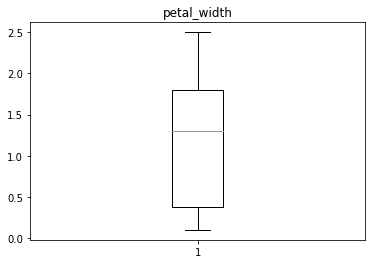

In [30]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()